In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# For use please adapt file path below (using original listings csv)

In [49]:
df = pd.read_csv('listings2024.csv')

# Column Cleaning

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20909 entries, 0 to 20908
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20909 non-null  int64  
 1   listing_url                                   20909 non-null  object 
 2   scrape_id                                     20909 non-null  int64  
 3   last_scraped                                  20909 non-null  object 
 4   source                                        20909 non-null  object 
 5   name                                          20909 non-null  object 
 6   description                                   20235 non-null  object 
 7   neighborhood_overview                         8984 non-null   object 
 8   picture_url                                   20909 non-null  object 
 9   host_id                                       20909 non-null 

In [51]:
#transform price, response_rate and acceptance_rate
def remove_percentage_dollar(df, columns):
    """
    Removes the '%' and '$' character from the specified columns and transforms them into floats.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to be transformed.
    columns (list): A list of column names to be transformed.

    Returns:
    pd.DataFrame: The DataFrame with the specified columns transformed.
    """
    for column in columns:
        df[column] = df[column].str.replace('%', '').str.replace('$', '')
    return df

# Applying the function to our DataFrame:
columns_to_remove_percentage_dollar = ['host_response_rate', 'host_acceptance_rate','price']
df = remove_percentage_dollar(df, columns_to_remove_percentage_dollar)

In [52]:
def transform_columns_to_float(df, columns):
    """
    Transforms the data type of specified columns in a DataFrame to integer.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to be transformed.
    columns (list): A list of column names to be transformed to integer.

    Returns:
    pd.DataFrame: The DataFrame with the specified columns transformed to integer.
    """
    for column in columns:
        df[column] = df[column].astype(float)/100
    return df

#Applying function to our DataFrame:
columns_to_transform_float = ['host_response_rate', 'host_acceptance_rate']
df=transform_columns_to_float(df, columns_to_transform_float)

In [53]:
def transform_columns_to_date(df, columns):
    """
    Transforms the data type of specified columns in a DataFrame to datetime.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to be transformed.
    columns (list): A list of column names to be transformed to datetime.

    Returns:
    pd.DataFrame: The DataFrame with the specified columns transformed to datetime.
    """
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return df

# Applying function to our DataFrame:
columns_to_transform_date = ['host_since', 'last_scraped','first_review', 'last_review']
df = transform_columns_to_date(df, columns_to_transform_date)

In [54]:
def transform_columns_to_bool(df, columns):
    """
    Transforms specified columns in a DataFrame with 't' and 'f' values to 1 and 0,
    preserving NA values.

    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        columns (list): List of column names to transform.

    Returns:
        pd.DataFrame: The modified DataFrame with specified columns converted.
    """
    for column in columns:
        if column in df.columns:
            df[column] = df[column].map({'t': 1, 'f': 0}).astype('Int64')  # 'Int64' preserves NA
        else:
            raise KeyError(f"Column '{column}' not found in the DataFrame.")
    return df

#Applying function to id in dataframe
columns_to_transform_bool = ['host_is_superhost','host_has_profile_pic','host_identity_verified']
df = transform_columns_to_bool(df, columns_to_transform_bool)

In [55]:
def drop_columns(df, columns_to_drop):
    """
    Drops specified columns from the dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe from which columns need to be dropped.
    columns_to_drop (list): A list of column names to be dropped.

    Returns:
    pd.DataFrame: The dataframe with the specified columns dropped.
    """
    df = df.drop(columns=columns_to_drop)
    return df

# Listing columns that we want to get rid of
columns_to_drop = ["listing_url",
"scrape_id",
"source",
"picture_url",
'host_listings_count',
'host_total_listings_count',
"host_neighbourhood",
"host_url",
"host_thumbnail_url",
"host_picture_url",
"neighbourhood",
"neighbourhood_group_cleansed",
"minimum_minimum_nights",
"maximum_minimum_nights",
"minimum_maximum_nights",
"maximum_maximum_nights",
"calendar_updated",
"calendar_last_scraped",
"license",
"calculated_host_listings_count_entire_homes",
"calculated_host_listings_count_private_rooms",
"calculated_host_listings_count_shared_rooms",
'property_type', 'bathrooms', 'host_verifications' , 'has_availability', 'instant_bookable','minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'number_of_reviews_l30d']
df = drop_columns(df, columns_to_drop)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20909 entries, 0 to 20908
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20909 non-null  int64         
 1   last_scraped                    20909 non-null  datetime64[ns]
 2   name                            20909 non-null  object        
 3   description                     20235 non-null  object        
 4   neighborhood_overview           8984 non-null   object        
 5   host_id                         20909 non-null  int64         
 6   host_name                       20908 non-null  object        
 7   host_since                      20908 non-null  datetime64[ns]
 8   host_location                   17480 non-null  object        
 9   host_about                      8866 non-null   object        
 10  host_response_time              14441 non-null  object        
 11  ho

# Data Enriching

In [57]:
df['price_in_dkk'] = df['price'].str.replace(',', '').astype(float)
df['price_in_dkk']

,price_in_dkk
0,NaN
1,1865.0
2,905.0
3,1865.0
4,1800.0
...,...
20904,880.0
20905,1500.0
20906,1500.0
20907,850.0


In [58]:
#create new column for price per person

df['price_per_person'] = df['price_in_dkk'] / df['accommodates']

In [59]:
#Divide Price into different classes

# Define bin edges and labels
bins = [0, 100, 200, 300, 400, 500, 1000, 4000]
labels = ['<100 DKK', '<200 DKK', '<300 DKK', '<400 DKK', '<500 DKK', '<1000 DKK',
          '>1000 DKK']

# Use qcut to split 'price_per_person' into  bins
df['price_class'] = pd.cut(df['price_per_person'], bins=bins, labels=labels, include_lowest=True)

# Verify the result
print(df[['price_per_person', 'price_class']].head())

# Check the distribution of the new price classes
print(df['price_class'].value_counts())

   price_per_person price_class
0               NaN         NaN
1           233.125    <300 DKK
2           452.500    <500 DKK
3           466.250    <500 DKK
4           450.000    <500 DKK
price_class
<400 DKK     3342
<1000 DKK    3200
<300 DKK     3048
<500 DKK     2966
<200 DKK      787
>1000 DKK     211
<100 DKK       32
Name: count, dtype: int64


In [60]:
df = df.drop(columns=['price'])

In [61]:
# creating a function that counts danish characters and provids an indicatr
# new name, description and host_about indicator column

def count_danish_characters(df, column_name):
    """
    Counts the occurrences of the letters 'æ', 'ø', and 'å' in each row of a specified column of a DataFrame and calculates the percentage of these characters in the text.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to be analyzed.
    column_name (str): The name of the column to be analyzed.

    Returns:
    pd.Series: A Series containing the percentage of the letters 'æ', 'ø', and 'å' in each row of the specified column.
    """
    special_characters = 'æøå'
    count = df[column_name].apply(lambda x: sum(x.count(char) for char in special_characters) if isinstance(x, str) else 0)
    total_characters = df[column_name].str.len()
    percentage = count / total_characters
    percentage = percentage.fillna(0)  # Fill NaN values with 0
    return percentage

# Applying function to name column
df['danish_name_indicator'] = count_danish_characters(df, 'name')

# Applying function to description column
df['danish_description_indicator'] = count_danish_characters(df, 'description')

# Applying function to host_about column
df['danish_host_about_indicator'] = count_danish_characters(df, 'host_about')

# Print the DataFrame to see the new columns
print(df)

                        id last_scraped  \
0                    31094   2024-06-30   
1                   262961   2024-06-30   
2                   263036   2024-06-30   
3                    32379   2024-06-30   
4                   263708   2024-06-30   
...                    ...          ...   
20904  1189068003466882100   2024-06-30   
20905  1188291058700847695   2024-06-29   
20906  1189086099059352914   2024-06-30   
20907  1188302911099164911   2024-06-29   
20908  1189116201603723600   2024-06-29   

                                                    name  \
0      Beautiful, spacious, central, renovated Penthouse   
1        192m2 FLAT+ 8m2 BALCONY IN CENTER NØRREBRO HOOD   
2                        Bright flat in central location   
3      155 m2 artist flat on Vesterbro, with 2 bathrooms   
4                      Urban garden on Vesterbro rooftop   
...                                                  ...   
20904                     Central lejlighed tæt på metro   
209

In [62]:
def categorize_host_location(location):
    """
    Categorizes the host location into three categories:
    1. Hosts from Copenhagen (including all areas of Copenhagen such as Frederiksberg etc.)
    2. Hosts from Denmark
    3. Hosts from outside of Denmark

    Parameters:
    location (str): The location of the host.

    Returns:
    str: The category of the host location.
    """
    # List of Copenhagen areas
    copenhagen_areas = [
        'Copenhagen', 'København', 'Indre By', 'Vesterbro', 'Nørrebro',
        'Østerbro', 'Amager', 'Christianshavn', 'Frederiksberg', 'Valby',
        'Vanløse', 'Brønshøj', 'Husum', 'Bispebjerg', 'Sydhavnen',
        'Islands Brygge', 'Nordvest', 'Refshaleøen', 'Holmen', 'Nyhavn',
        'Carlsberg Byen', 'Ørestad', 'Kødbyen', 'Kongens Nytorv',
        'Fælledparken', 'Gammelholm', 'Langelinie', 'Nordhavn', 'Sydhavn',
        'Bellahøj'
    ]

    # Handle missing or non-string values
    if pd.isna(location):
        return np.nan  # Return actual NaN
    if not isinstance(location, str):
        return 'Unknown'

    # Categorize based on location
    if any(area in location for area in copenhagen_areas):
        return 'Copenhagen'
    elif 'Denmark' in location or 'Danmark' in location:
        return 'Denmark'
    else:
        return 'Outside Denmark'

# Apply the function to the 'host_location' column
df['host_location_category'] = df['host_location'].apply(categorize_host_location)

# Display the value counts of the new column
print(df['host_location_category'].value_counts())

host_location_category
Copenhagen         16065
Denmark             1132
Outside Denmark      283
Name: count, dtype: int64


In [63]:
df = df.drop(columns=['host_location'])

In [64]:
# function to categorize reponse time

def categorize_response_time(response_time):
    if response_time == 'within an hour':
        return 1
    elif response_time == 'within a few hours':
        return 2
    elif response_time == 'within a day':
        return 3
    elif response_time == 'a few days or more':
        return 4
    else: # For NaN values
        return 0
df['host_response_time_int'] = df['host_response_time'].apply(categorize_response_time)

In [65]:
df = df.drop(columns=['host_response_time'])

In [66]:
# functions for boolean's if there is a text or not

def has_text(text):
    """Returns 1 if the text is not NaN and not empty, otherwise 0."""
    return 1 if pd.notna(text) and bool(text) else 0

df['host_about_bool'] = df['host_about'].apply(has_text)
df['description_bool'] = df['description'].apply(has_text)
df['neighbourhood_overview_bool'] = df['neighborhood_overview'].apply(has_text)

# Display the first few rows to verify the new columns
print(df[['host_about', 'host_about_bool', 'description', 'description_bool', 'neighborhood_overview', 'neighbourhood_overview_bool']].head())

                                          host_about  host_about_bool  \
0  Hi and welcome. My name is Ebbe, I am a medica...                1   
1  Hej -  I read the Master in Pedagogy. My husba...                1   
2                                 Bla, bla, bla, bla                1   
3  As profession - Set and Costumedesigner for Av...                1   
4                                                NaN                0   

                                         description  description_bool  \
0  Welcome to our home, we hope you will enjoy Wo...                 1   
1  If you are looking for a large apartment in ce...                 1   
2                                                NaN                 0   
3  You enter a narrow entrance and feel the good ...                 1   
4                                                NaN                 0   

                               neighborhood_overview  \
0  What else is nearby?<br />To be honest, We thi...   
1  T

In [67]:
# Handle missing 'bathrooms_text' values and split into two columns
def split_bathroom_text(df):
    """
    Splits the 'bathrooms_text' column into 'bathrooms_number' and 'bathrooms_type'.
    Ensures that NaN in 'bathrooms_text' propagates to the new columns.
    """
    # Handle missing values explicitly before splitting
    df['bathrooms_number'] = np.nan
    df['bathrooms_type'] = np.nan

    # Only process non-NaN values
    non_na_bathrooms = df['bathrooms_text'].dropna().str.extract(r'(\d*\.?\d+)?\s*(.*)')

    # Assign split values back to the DataFrame
    df.loc[non_na_bathrooms.index, 'bathrooms_number'] = non_na_bathrooms[0]
    df.loc[non_na_bathrooms.index, 'bathrooms_type'] = non_na_bathrooms[1]

    # Standardize 'bathrooms_type'
    df['bathrooms_type'] = df['bathrooms_type'].apply(
        lambda x: 'shared' if isinstance(x, str) and 'shared' in x.lower() else ('private' if isinstance(x, str) else np.nan)
    )

    # Convert 'bathrooms_number' to numeric
    df['bathrooms_number'] = pd.to_numeric(df['bathrooms_number'], errors='coerce')

    return df

# Apply the function
df = split_bathroom_text(df)

# Display the first few rows to verify the changes
print(df[['bathrooms_text', 'bathrooms_number', 'bathrooms_type']].head())

  bathrooms_text  bathrooms_number bathrooms_type
0      1.5 baths               1.5        private
1      1.5 baths               1.5        private
2        0 baths               0.0        private
3        2 baths               2.0        private
4         1 bath               1.0        private


<ipython-input-67-375ca08adf00>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1.5' '1.5' '0' ... '1' '1' '1']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[non_na_bathrooms.index, 'bathrooms_number'] = non_na_bathrooms[0]
<ipython-input-67-375ca08adf00>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['baths' 'baths' 'baths' ... 'bath' 'bath' 'bath']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[non_na_bathrooms.index, 'bathrooms_type'] = non_na_bathrooms[1]


In [68]:
df = df.drop(columns=['bathrooms_text'])

In [69]:
# function that counts amenities

df['amenities'].value_counts()
def count_commas(amenities):
    """
    Counts the number of commas in the amenities string.

    Parameters:
    amenities (str): The amenities string.

    Returns:
    int: The number of commas in the amenities string.
    """
    if isinstance(amenities, str):
        return amenities.count(',')
    return 0

# Apply the function to the 'amenities' column and create a new column 'count_amenities'
df['count_amenities'] = df['amenities'].apply(count_commas)

# Display the value counts of the new column
print(df['count_amenities'].value_counts())

count_amenities
8     538
6     530
7     527
5     491
9     475
     ... 
80      2
94      1
85      1
87      1
83      1
Name: count, Length: 88, dtype: int64


In [70]:
# Clean Neighbourhood Labels
neighbourhood_mapping = {
    "Nrrebro": "Nørrebro",
    "Vesterbro–Kongens Enghave": "Vesterbro-Kongens Enghave",
    "Indre By": "Indre By",
    "sterbro": "Østerbro",
    "Frederiksberg": "Frederiksberg",
    "Amager Vest": "Amager Vest",
    "Amager st": "Amager Øst",
    "Bispebjerg": "Bispebjerg",
    "Valby": "Valby",
    "Vanlse": "Vanløse",
    "Brnshj-Husum": "Brønshøj-Husum",
}

# Create a new column with corrected names
df['neighbourhood_corrected'] = df['neighbourhood_cleansed'].replace(neighbourhood_mapping)

# Verify the changes
print(df[['neighbourhood_cleansed', 'neighbourhood_corrected']])

          neighbourhood_cleansed    neighbourhood_corrected
0      Vesterbro-Kongens Enghave  Vesterbro-Kongens Enghave
1                        Nrrebro                   Nørrebro
2                        Nrrebro                   Nørrebro
3      Vesterbro-Kongens Enghave  Vesterbro-Kongens Enghave
4      Vesterbro-Kongens Enghave  Vesterbro-Kongens Enghave
...                          ...                        ...
20904              Frederiksberg              Frederiksberg
20905                Amager Vest                Amager Vest
20906                    Nrrebro                   Nørrebro
20907                    sterbro                   Østerbro
20908                    sterbro                   Østerbro

[20909 rows x 2 columns]


In [71]:
df = df.drop(columns=['neighbourhood_cleansed'])

In [72]:
df['first_review'].dtype

dtype('<M8[ns]')

In [73]:
# Calculate the listing duration
df['listing_duration'] = (df['last_review'] - df['first_review']).dt.days

# Display the first few rows to verify the changes
df[['first_review', 'last_review', 'listing_duration']].value_counts()

first_review  last_review  listing_duration
2024-06-16    2024-06-16   0.0                 54
2024-06-17    2024-06-17   0.0                 48
2024-05-12    2024-05-12   0.0                 43
2024-06-23    2024-06-23   0.0                 40
2024-06-15    2024-06-15   0.0                 26
                                               ..
2019-08-22    2020-01-16   147.0                1
              2020-11-30   466.0                1
2019-08-23    2019-11-23   92.0                 1
              2020-01-03   133.0                1
2022-05-08    2022-08-03   87.0                 1
Name: count, Length: 15491, dtype: int64

In [74]:
# Create Availability Percentage Column for 90 days
df['availability_90_%']=df['availability_90']/90

df['availability_90_%'].head()

,availability_90_%
0,0.000000
1,0.000000
2,0.355556
3,0.244444
4,0.500000


In [75]:
# Create Host Age Category
# Calculate the host age in years
df['host_age'] = 2024 - df['host_since'].dt.year

# Create a new column to categorize the listings into age groups
def categorize_host_age(age):
    if 0 <= age <= 5:
        return '0-5 years'
    elif 6 <= age <= 10:
        return '5-10 years'
    elif 11 <= age <= 15:
        return '10-15 years'
    else:
        return 'older than 15 years'

df['host_age_category'] = df['host_age'].apply(categorize_host_age)

# Drop the host_age column because not needed anymore
df.drop(columns=['host_age'], inplace=True)

# Display the first few rows to verify the new column
print(df['host_age_category'].value_counts())

host_age_category
5-10 years             12292
0-5 years               4874
10-15 years             3739
older than 15 years        4
Name: count, dtype: int64


In [76]:
# Include potential additional revenue
#for hosts
df['Yearly_host_revenue'] = (365-df['availability_365'])*df['price_in_dkk']*0.97

#for Airbnb assuming 3% commission
df['Yearly_airbnb_revenue'] = (365-df['availability_365'])*df['price_in_dkk']*0.03
df['Yearly_airbnb_revenue'].sum()

125801103.99

In [77]:
# Create Worst and Best 10% Listings for Analysis
df['combined_score'] = (
    (df['review_scores_rating'] - df['review_scores_rating'].min()) / (df['review_scores_rating'].max() - df['review_scores_rating'].min()) * 0.5 +
    (df['availability_90'] - df['availability_90'].min()) / (df['availability_90'].max() - df['availability_90'].min()) * 0.5
)

# Calculate thresholds
top_10_percent = df['combined_score'].quantile(0.9)
bottom_10_percent = df['combined_score'].quantile(0.1)

def categorize_combined(row):
    if row['combined_score'] >= top_10_percent:
        return 'Best 10%'
    elif row['combined_score'] <= bottom_10_percent:
        return 'Worst 10%'
    else:
        return 'Other'

# Apply the categorization
df['Overall_Category'] = df.apply(categorize_combined, axis=1)

# Drop the combined_score column because not needed anymore
df.drop(columns=['combined_score'], inplace=True)

# Display the value counts of the overall category
print(df['Overall_Category'].value_counts())

Overall_Category
Other        17293
Worst 10%     1846
Best 10%      1770
Name: count, dtype: int64


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20909 entries, 0 to 20908
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20909 non-null  int64         
 1   last_scraped                    20909 non-null  datetime64[ns]
 2   name                            20909 non-null  object        
 3   description                     20235 non-null  object        
 4   neighborhood_overview           8984 non-null   object        
 5   host_id                         20909 non-null  int64         
 6   host_name                       20908 non-null  object        
 7   host_since                      20908 non-null  datetime64[ns]
 8   host_about                      8866 non-null   object        
 9   host_response_rate              14441 non-null  float64       
 10  host_acceptance_rate            17161 non-null  float64       
 11  ho

#Row Cleaning

In [79]:
duplicates = df[df.duplicated()]
print("Duplicate rows in the DataFrame:")
print(duplicates)

Duplicate rows in the DataFrame:
Empty DataFrame
Columns: [id, last_scraped, name, description, neighborhood_overview, host_id, host_name, host_since, host_about, host_response_rate, host_acceptance_rate, host_is_superhost, host_has_profile_pic, host_identity_verified, latitude, longitude, room_type, accommodates, bedrooms, beds, amenities, minimum_nights, maximum_nights, availability_30, availability_60, availability_90, availability_365, number_of_reviews, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, calculated_host_listings_count, reviews_per_month, price_in_dkk, price_per_person, price_class, danish_name_indicator, danish_description_indicator, danish_host_about_indicator, host_location_category, host_response_time_int, host_about_bool, description_bool, neighbourhood_overview_bool, bathrooms_number, bathrooms_type, count_amenities,

In [80]:
# Detect outliers

# Filter numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Function to detect outliers based on IQR
def detect_outliers_iqr(df, columns):
    outliers_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        # Save summary
        outliers_summary[col] = {
            'num_outliers': len(outliers),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    return outliers_summary

# Detect outliers
outliers_report = detect_outliers_iqr(df, numerical_cols)

# Display the results
for col, report in outliers_report.items():
    print(f"Column: {col}")
    print(f" - Number of Outliers: {report['num_outliers']}")
    print(f" - IQR Bounds: {report['lower_bound']} to {report['upper_bound']}\n")

Column: id
 - Number of Outliers: 0
 - IQR Bounds: -1.4161884263776532e+18 to 2.360314044046501e+18

Column: host_id
 - Number of Outliers: 1428
 - IQR Bounds: -271063243.0 to 498162773.0

Column: host_response_rate
 - Number of Outliers: 3590
 - IQR Bounds: 1.0 to 1.0

Column: host_acceptance_rate
 - Number of Outliers: 0
 - IQR Bounds: -0.35000000000000003 to 1.81

Column: host_is_superhost
 - Number of Outliers: 2471
 - IQR Bounds: 0.0 to 0.0

Column: host_has_profile_pic
 - Number of Outliers: 589
 - IQR Bounds: 1.0 to 1.0

Column: host_identity_verified
 - Number of Outliers: 2336
 - IQR Bounds: 1.0 to 1.0

Column: latitude
 - Number of Outliers: 77
 - IQR Bounds: 55.62163783219273 to 55.74068361301212

Column: longitude
 - Number of Outliers: 212
 - IQR Bounds: 12.481062999999999 to 12.640175

Column: accommodates
 - Number of Outliers: 485
 - IQR Bounds: -1.0 to 7.0

Column: bedrooms
 - Number of Outliers: 849
 - IQR Bounds: -0.5 to 3.5

Column: beds
 - Number of Outliers: 1385


In [81]:
# Filter the DataFrame to exclude apartments with minimum nights greater than 14 (in total taking out 418 listings)

df = df[df['minimum_nights'] <= 14]
print(df.shape)

(20428, 60)


In [82]:
# Get the 20 highest values of the 'price_per_person' column

top_20_price_per_person = df['price_per_person'].nlargest(20)
print(top_20_price_per_person)

15986    19949.500000
7361     10450.000000
6626      6000.000000
16519     5500.000000
4777      5400.000000
4062      5000.000000
7711      5000.000000
12021     5000.000000
2343      3480.000000
9774      3460.000000
2104      3333.333333
2648      3333.333333
15984     3200.000000
2907      3035.750000
7201      3000.000000
7785      2500.000000
9253      2500.000000
11721     2500.000000
3088      2499.750000
8741      2499.750000
Name: price_per_person, dtype: float64


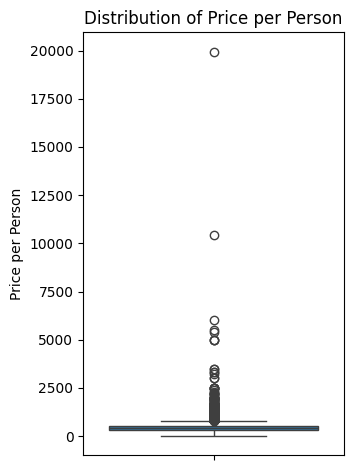

In [83]:
# Create a boxplot for price_per_person
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price_per_person'])
plt.title('Distribution of Price per Person')
plt.ylabel('Price per Person')

plt.tight_layout()
plt.show()

In [84]:
# Filter out the rows where price_per_person is higher or equal to 5000, but keep NaN values; in total: 8

df= df[(df['price_per_person'] < 5000) | (df['price_per_person'].isna())]

print(df.shape)

(20420, 60)


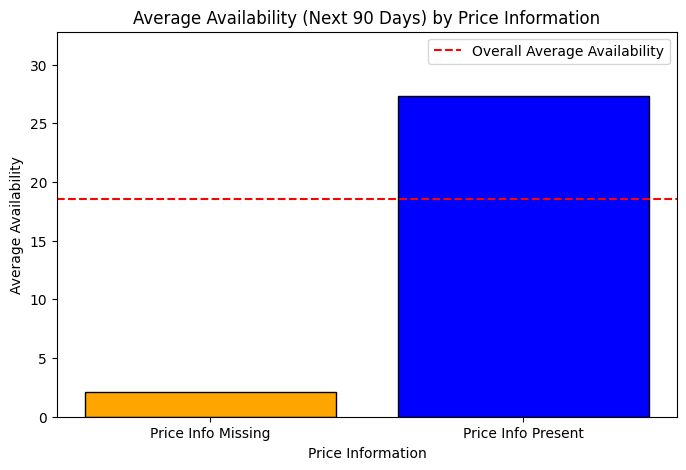

In [85]:
#visualize availability of listings with price vs without price --> decision: listings with no price skew availability metrics so can be taken out

# Separate listings based on the presence of price information
price_missing = df[df['price_in_dkk'].isnull()]
price_present = df[df['price_in_dkk'].notnull()]

# Calculate availability within the next 90 days for each group
price_missing_availability = price_missing['availability_90'].mean()
price_present_availability = price_present['availability_90'].mean()

# Create a bar chart
plt.figure(figsize=(8, 5))
categories = ['Price Info Missing', 'Price Info Present']
values = [price_missing_availability, price_present_availability]

plt.bar(categories, values, color=['orange', 'blue'], edgecolor='black')
plt.title('Average Availability (Next 90 Days) by Price Information')
plt.ylabel('Average Availability')
plt.xlabel('Price Information')
plt.ylim(0, max(values) * 1.2)
plt.axhline(y=df['availability_90'].mean(), color='red', linestyle='--', label='Overall Average Availability')
plt.legend()
plt.show()

In [86]:
# dropping rows where there is no price
df = df.dropna(subset=['price_per_person'])
print(df.shape)

(13310, 60)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13310 entries, 1 to 20908
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              13310 non-null  int64         
 1   last_scraped                    13310 non-null  datetime64[ns]
 2   name                            13310 non-null  object        
 3   description                     12873 non-null  object        
 4   neighborhood_overview           5266 non-null   object        
 5   host_id                         13310 non-null  int64         
 6   host_name                       13310 non-null  object        
 7   host_since                      13310 non-null  datetime64[ns]
 8   host_about                      5528 non-null   object        
 9   host_response_rate              11667 non-null  float64       
 10  host_acceptance_rate            12492 non-null  float64       
 11  host_is

# Preparing Final Dataset for Analytical Database Model and Dashboard

In [88]:
df = df.drop(columns = ['name', 'description', 'neighborhood_overview', 'host_about'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13310 entries, 1 to 20908
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              13310 non-null  int64         
 1   last_scraped                    13310 non-null  datetime64[ns]
 2   host_id                         13310 non-null  int64         
 3   host_name                       13310 non-null  object        
 4   host_since                      13310 non-null  datetime64[ns]
 5   host_response_rate              11667 non-null  float64       
 6   host_acceptance_rate            12492 non-null  float64       
 7   host_is_superhost               13215 non-null  Int64         
 8   host_has_profile_pic            13310 non-null  Int64         
 9   host_identity_verified          13310 non-null  Int64         
 10  latitude                        13310 non-null  float64       
 11  longitu

In [89]:
df.to_csv('df_listings_er.csv', index=False)